# Section 1: Questions to Answer

##### Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?
Importance in Today's World:
Predicting credit card approval is crucial in today's world due to the increasing reliance on data-driven decision-making. 
Banks need accurate methods to assess applicants' creditworthiness and manage risks effectively. 
With the rise in digital transactions and online applications, banks must have efficient systems to evaluate applicants' 
financial stability and behavior.

Benefits for a Bank:
Predicting a good client helps a bank by reducing the risk of defaults and fraud. 
Banks can avoid approving credit cards for individuals with a high likelihood of defaulting on payments.
This enhances the bank's portfolio quality, reduces losses, and improves overall profitability.

##### How is it going to impact the banking sector?
Impact on the Banking Sector:
Predicting credit card approval accurately impacts the banking sector by streamlining the application process, 
improving customer satisfaction, and minimizing financial losses. By using data-driven models, 
banks can make more informed decisions, leading to a healthier credit card portfolio and more robust risk management practices.

##### If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.
Addressing Knowledge Gaps for Future Banks:
The proposed method can help future banks in India by providing insights into effective credit assessment techniques. 
It can bridge the gap in understanding how various customer attributes, financial indicators, 
and external data sources can be combined to build accurate credit approval models.

# Section 2: Initial Hypothesis (or hypotheses)

##### Here you have to make some assumptions based on the questions you want to address based on the DA track or ML track. 

##### If DA track please aim to identify patterns in the data and important features that may impact a ML model.

##### If ML track please perform part ‘i’ as well as multiple machine learning models, perform all required steps to check if there is any assumption and justify your model. Why is your model better than any other possible model? Please justify it by relevant cost functions and if possible by any graph.

##### From step 1, you may see some relationship that you want to explore and will develop a belief about data


Initial Hypotheses:

* Higher annual income and property ownership may lead to a higher likelihood of credit card approval.
* Applicants with stable employment histories may have a better chance of credit card approval.
* Customers with more family members might have a higher income and, thus, a better chance of approval.
* Gender may not be a significant factor in credit card approval decisions.


# Section 3: Data analysis approach

What approach are you going to take in order to prove or disprove your hypothesis?

What feature engineering techniques will be relevant to your project?

Please justify your data analysis approach.

Identify important patterns in your data using the EDA approach to justify your findings.



To prove or disprove the initial hypotheses, the following data analysis approach will be taken:

Step 1: Data Preperation:
* A - Loading and Merging Datasets
* B - Data Type Checking and Conversion
* C - Cleaning,Transforming and Renaming Columns
* D - Handling Missing Values 
* E - Handling Inconsistent Text and Typos
* F - Handling Duplicates
* G - Handling Outliers

Step 2: Exploratory Data Analysis (EDA): Understand the distribution of variables by carring out:
* A - Univariate Analysis
* B - Bivariate Analysis

Step 3: Correlation Analysis: Analyze correlations between features and the target label (credit card approval) 
using .corr()

Step 4: Hypothesis Testing: Perform statistical tests (e.g., t-tests, chi-square tests) to validate hypotheses 
and identify significant variables.


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## Step 1: Data Preparation

##### A - Loading and Merging Datasets

In [2]:
# Define the file path for the credit card dataset
Credit_card_file_path = 'C:\\Users\\nipun\\Desktop\\Data Scientist\\Odin School\\Capestone projects\\Credit Card Approval Prediction\\Credit_card.csv'

# Read the dataset into a DataFrame using pandas
Credit_card_df = pd.read_csv(Credit_card_file_path)

# Display the first few rows of the DataFrame to inspect the data
Credit_card_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [3]:
# Define the file path for the credit card label dataset
Credit_card_label_file_path = 'C:\\Users\\nipun\\Desktop\\Data Scientist\\Odin School\\Capestone projects\\Credit Card Approval Prediction\\Credit_card_label.csv'

# Read the label dataset into a DataFrame using pandas
Credit_card_label_df = pd.read_csv(Credit_card_label_file_path)

# Display the first few rows of the label DataFrame to inspect the data
Credit_card_label_df.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [4]:
# Merge the credit card data DataFrame (Credit_card_df) with the credit card label DataFrame (Credit_card_label_df)
# using the 'Ind_ID' column as the key for the merge operation
Credit_card_data = pd.merge(Credit_card_df, Credit_card_label_df, on='Ind_ID')

# Display the first few rows of the merged DataFrame to examine the result
Credit_card_data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


###### Summary: 
Defined file paths for two CSV datasets, read them into DataFrames (Credit_card_df and Credit_card_label_df), displayed the initial data from both, merged them based on a common column ('Ind_ID'), and displayed the initial data of the merged DataFrame (Credit_card_data).

##### B - Data Type Checking and Conversion


In [5]:
# Check if the data types of feature in the Credit_card_data DataFrame are correct
Credit_card_data.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
label                int64
dtype: object

###### Summary: 
This code checks and confirms that all data types in the Credit_card_data DataFrame appear to be correct, indicating that no data type conversion is needed.

##### C - Cleaning,Transforming and Renaming Columns

In [6]:
# Define a dictionary that maps old feature names to new feature names for feature renaming
new_features_names = {
    'Ind_ID': 'ID',
    'GENDER': 'gender',
    'Car_Owner': 'car_owner',
    'Propert_Owner': 'property_owner',
    'CHILDREN': 'children',
    'Annual_income': 'annual_income',
    'Type_Income': 'income_type',
    'EDUCATION': 'education',
    'Marital_status': 'marital_status',
    'Housing_type': 'housing_type',
    'Birthday_count': 'age',
    'Employed_days': 'job_experience',
    'Mobile_phone': 'mobile_phone',
    'Work_Phone': 'work_phone',
    'Phone': 'phone',
    'EMAIL_ID': 'email_ID',
    'Type_Occupation' : 'occupation_type',
    'Family_Members': 'family_members',
    'label': 'approved'
}

In [7]:
# Rename the columns in the Credit_card_data DataFrame using the defined mapping
Credit_card_data.rename(columns=new_features_names, inplace=True)

In [8]:
# Display the first few rows of the Credit_card_data DataFrame after renaming the columns
Credit_card_data.head()

,ID,gender,car_owner,property_owner,children,annual_income,income_type,education,marital_status,housing_type,age,job_experience,mobile_phone,work_phone,phone,email_ID,occupation_type,family_members,approved
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [9]:
# Convert the 'age' feature from days to years and round the result
Credit_card_data['age'] = round(Credit_card_data.age.div(-365))

# Set 'job_experience' to 0 where it is greater than 0
Credit_card_data['job_experience'] = np.where(Credit_card_data['job_experience'] > 0, 0, Credit_card_data['job_experience'])

# Convert negative 'Employed_days' values from days to years and retain non-negative values
Credit_card_data['job_experience'] = np.where(Credit_card_data['job_experience'] < 0,
                                             round(Credit_card_data.job_experience.div(-365)),
                                             Credit_card_data['job_experience'])

In [10]:
# Display the first few rows of the updated Credit_card_data DataFrame
Credit_card_data.head()

,ID,gender,car_owner,property_owner,children,annual_income,income_type,education,marital_status,housing_type,age,job_experience,mobile_phone,work_phone,phone,email_ID,occupation_type,family_members,approved
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,2.0,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,NaN,2,1


###### Summary: 
Conducted data transformation and feature renaming in the Credit_card_data DataFrame. This included renaming columns based on a predefined mapping, converting 'age' from days to years, handling negative 'job_experience' values by converting them to years, and displaying the updated DataFrame.

##### D - Handling Missing Values 

In [11]:
# Check for missing values (NaN) in the Credit_card_data DataFrame and sum them up for each feature
Credit_card_data.isna().sum()

ID                   0
gender               7
car_owner            0
property_owner       0
children             0
annual_income       23
income_type          0
education            0
marital_status       0
housing_type         0
age                 22
job_experience       0
mobile_phone         0
work_phone           0
phone                0
email_ID             0
occupation_type    488
family_members       0
approved             0
dtype: int64

In [12]:
# Calculate the percentage of missing values for each feature in the Credit_card_data DataFrame
(Credit_card_data.isna().sum() / len(Credit_card_data)) * 100

ID                  0.000000
gender              0.452196
car_owner           0.000000
property_owner      0.000000
children            0.000000
annual_income       1.485788
income_type         0.000000
education           0.000000
marital_status      0.000000
housing_type        0.000000
age                 1.421189
job_experience      0.000000
mobile_phone        0.000000
work_phone          0.000000
phone               0.000000
email_ID            0.000000
occupation_type    31.524548
family_members      0.000000
approved            0.000000
dtype: float64

In [13]:
# Define a dictionary containing fill values for specific columns
fill_values = {
    'gender': Credit_card_data['gender'].mode()[0],
    'annual_income': Credit_card_data['annual_income'].mean(),
    'age': Credit_card_data['age'].mean()
}

# Fill missing values in the Credit_card_data DataFrame using the specified fill_values
Credit_card_data.fillna(fill_values, inplace=True)

# Drop the 'Type_Occupation' feature from the DataFrame
Credit_card_data.drop(columns=['occupation_type'], inplace=True)

# Check for missing values again after dropping rows and the 'Type_Occupation' feature
Credit_card_data.isna().sum()

ID                0
gender            0
car_owner         0
property_owner    0
children          0
annual_income     0
income_type       0
education         0
marital_status    0
housing_type      0
age               0
job_experience    0
mobile_phone      0
work_phone        0
phone             0
email_ID          0
family_members    0
approved          0
dtype: int64

###### Summary:
Checked for missing values in the Credit_card_data DataFrame, calculated the percentage of missing values for each column, and then imputed rows with missing values in specific columns ('GENDER', 'Annual_income', 'Birthday_count') with mode,mean and mean imputation respectively. Additionally,removed the 'occupation_type' column from the DataFrame since they seem irrelevant for credit car approval prediction and also contribute to 31.52% of data and dropping them will lead to data loss. Finally checked for missing values again after these operations.

##### E - Handling Inconsistent Text and Typos


In [14]:
# Define lists for categorical features and numerical features in the Credit_card_data DataFrame
cat_features = ['gender', 'car_owner', 'property_owner', 'income_type', 'education', 'marital_status', 'housing_type',
               'mobile_phone', 'work_phone', 'phone', 'email_ID','approved']
num_features = ['ID', 'children', 'annual_income', 'age', 'job_experience','family_members']

In [15]:
# Iterate through categorical columns and print their value counts
for features in cat_features:
    print(f"Feature: {features}")
    print(Credit_card_data[features].value_counts())
    print("-" * 30)

Feature: gender
F    980
M    568
Name: gender, dtype: int64
------------------------------
Feature: car_owner
N    924
Y    624
Name: car_owner, dtype: int64
------------------------------
Feature: property_owner
Y    1010
N     538
Name: property_owner, dtype: int64
------------------------------
Feature: income_type
Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: income_type, dtype: int64
------------------------------
Feature: education
Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: education, dtype: int64
------------------------------
Feature: marital_status
Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: marital_status, dtype: int64
------------------------------

In [16]:
# Generate summary statistics for the numerical columns in the Credit_card_data DataFrame
Credit_card_data[num_features].describe()

,ID,children,annual_income,age,job_experience,family_members
count,1.548000e+03,1548.000000,1.548000e+03,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,43.952818,6.071059,2.161499
std,4.171759e+04,0.776691,1.124080e+05,11.520494,6.591026,0.947772
min,5.008827e+06,0.000000,3.375000e+04,21.000000,0.000000,1.000000
25%,5.045070e+06,0.000000,1.215000e+05,34.000000,1.000000,2.000000
50%,5.078842e+06,0.000000,1.710000e+05,43.000000,4.000000,2.000000
75%,5.115673e+06,1.000000,2.250000e+05,53.000000,9.000000,3.000000
max,5.150412e+06,14.000000,1.575000e+06,68.000000,41.000000,15.000000


###### Summary:
Organized the columns in the Credit_card_data DataFrame into categorical and numerical lists. Inspected the disctinct values in categorical columns and generated summary statistics for the numerical columns to identify inconsistencies and typos.Found none.

##### F - Handling Duplicates



In [17]:
# Check for duplicated rows in the Credit_card_data DataFrame and sum the duplicates
Credit_card_data.duplicated().sum()

0

###### Summary:
Checked for duplicated rows in the Credit_card_data DataFrame and found that there are no duplicate rows since the sum of duplicates is zero.

##### G - Handling Outliers


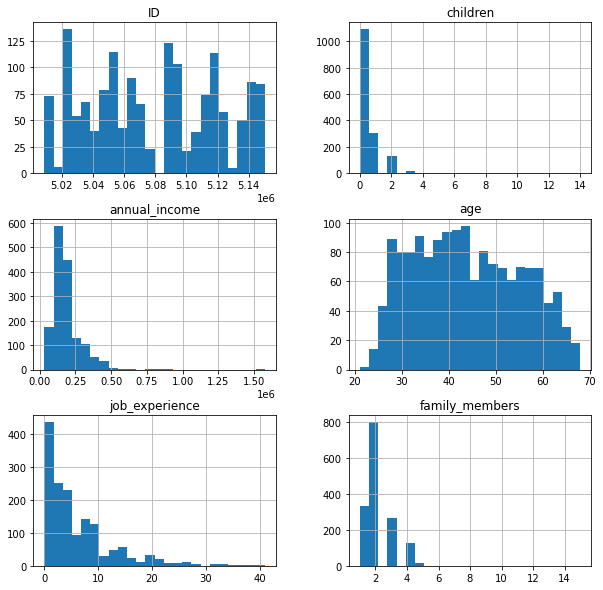

In [18]:
# Create histograms for the numerical features in the Credit_card_data DataFrame with a specified figure size
Credit_card_data.hist(column=num_features, figsize=(10, 10),bins='rice');

C:\Users\nipun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


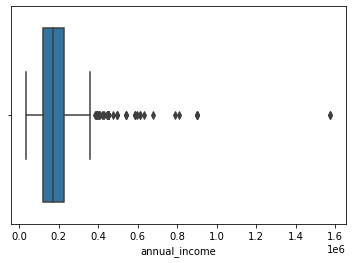

In [19]:
# Create a boxplot for the 'annual_income' column using seaborn and display the plot
sns.boxplot(Credit_card_data.annual_income)
plt.show()

In [20]:
# Filter and display rows in Credit_card_data where 'annual_income' is greater than or equal to 1,500,000
Credit_card_data[Credit_card_data.annual_income >= 1500000]

,ID,gender,car_owner,property_owner,children,annual_income,income_type,education,marital_status,housing_type,age,job_experience,mobile_phone,work_phone,phone,email_ID,family_members,approved
211,5143231,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,28.0,7.0,1,0,0,0,2,0
233,5143235,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,28.0,7.0,1,0,0,0,2,0


In [21]:
# Update Credit_card_data to only include rows where 'annual_income' is less than or equal to 1,500,000
Credit_card_data = Credit_card_data[Credit_card_data.annual_income <= 1500000]

C:\Users\nipun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


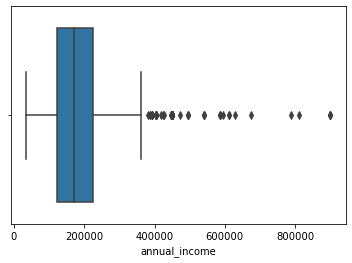

In [22]:
# Create a boxplot for the 'annual_income' column using seaborn
sns.boxplot(Credit_card_data.annual_income)
plt.show()

##### Summary:
Implemented outlier handling by visualizing numerical feature distributions using a histogram, identifying outliers in the 'annual_income' column, and subsequently filtering the dataset to remove rows with 'annual_income' values exceeding 1,500,000. This effectively addresses outliers in that specific numerical feature.

## Step 2: Exploratory Data Analysis

##### A - Univariate Analysis



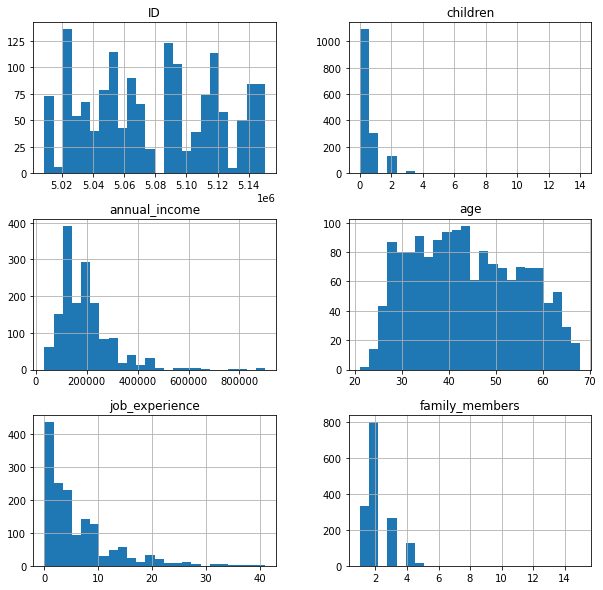

In [23]:
# Create histograms for the numerical features (num_features) in the Credit_card_data DataFrame
Credit_card_data.hist(column=num_features, figsize=(10, 10), bins='rice');

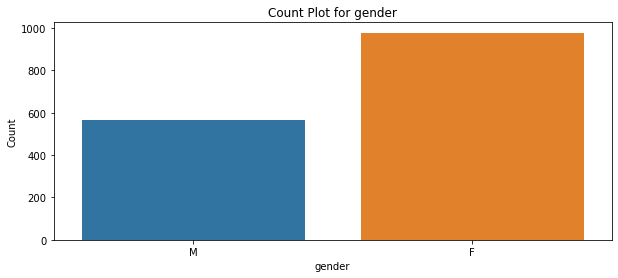

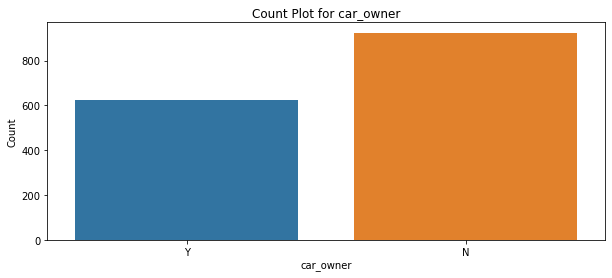

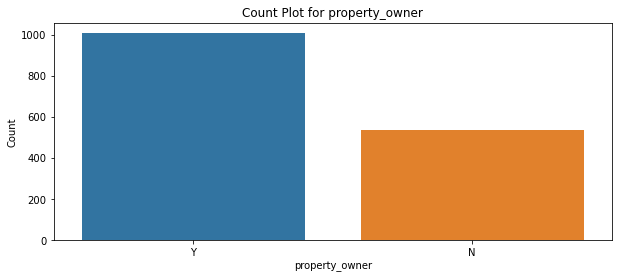

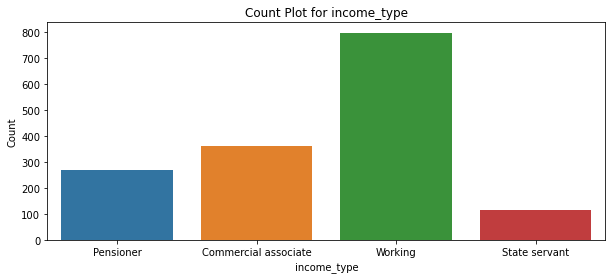

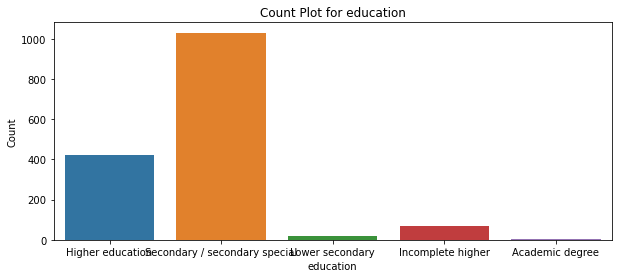

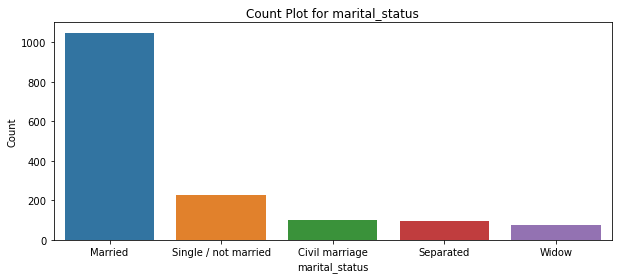

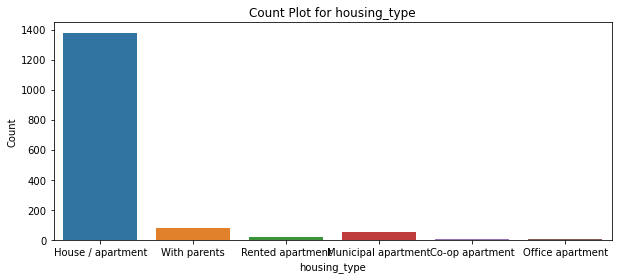

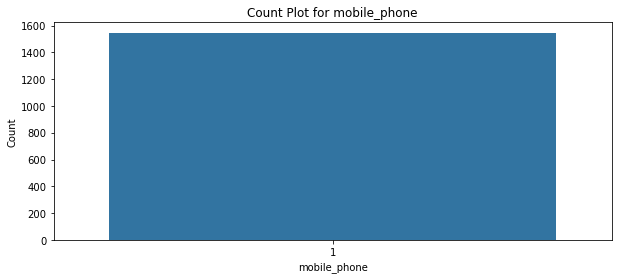

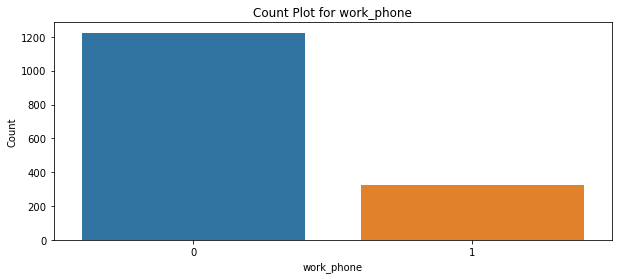

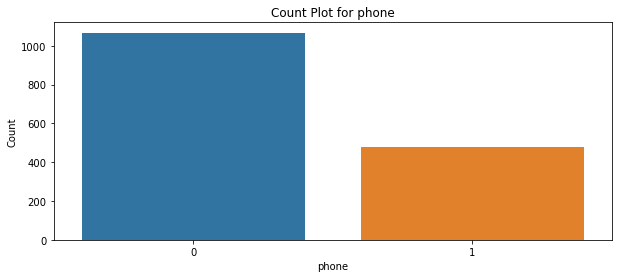

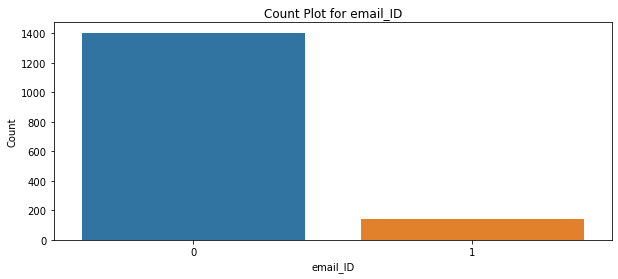

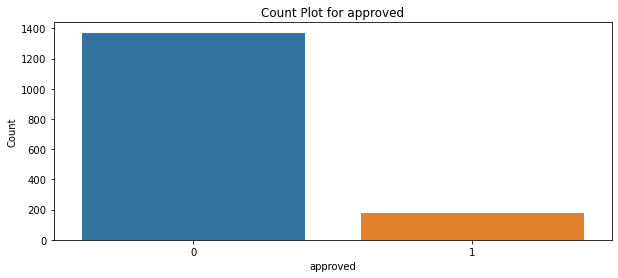

In [24]:
for feature in cat_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=feature, data=Credit_card_data)
    plt.title(f'Count Plot for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

##### B - Bivariate Analysis

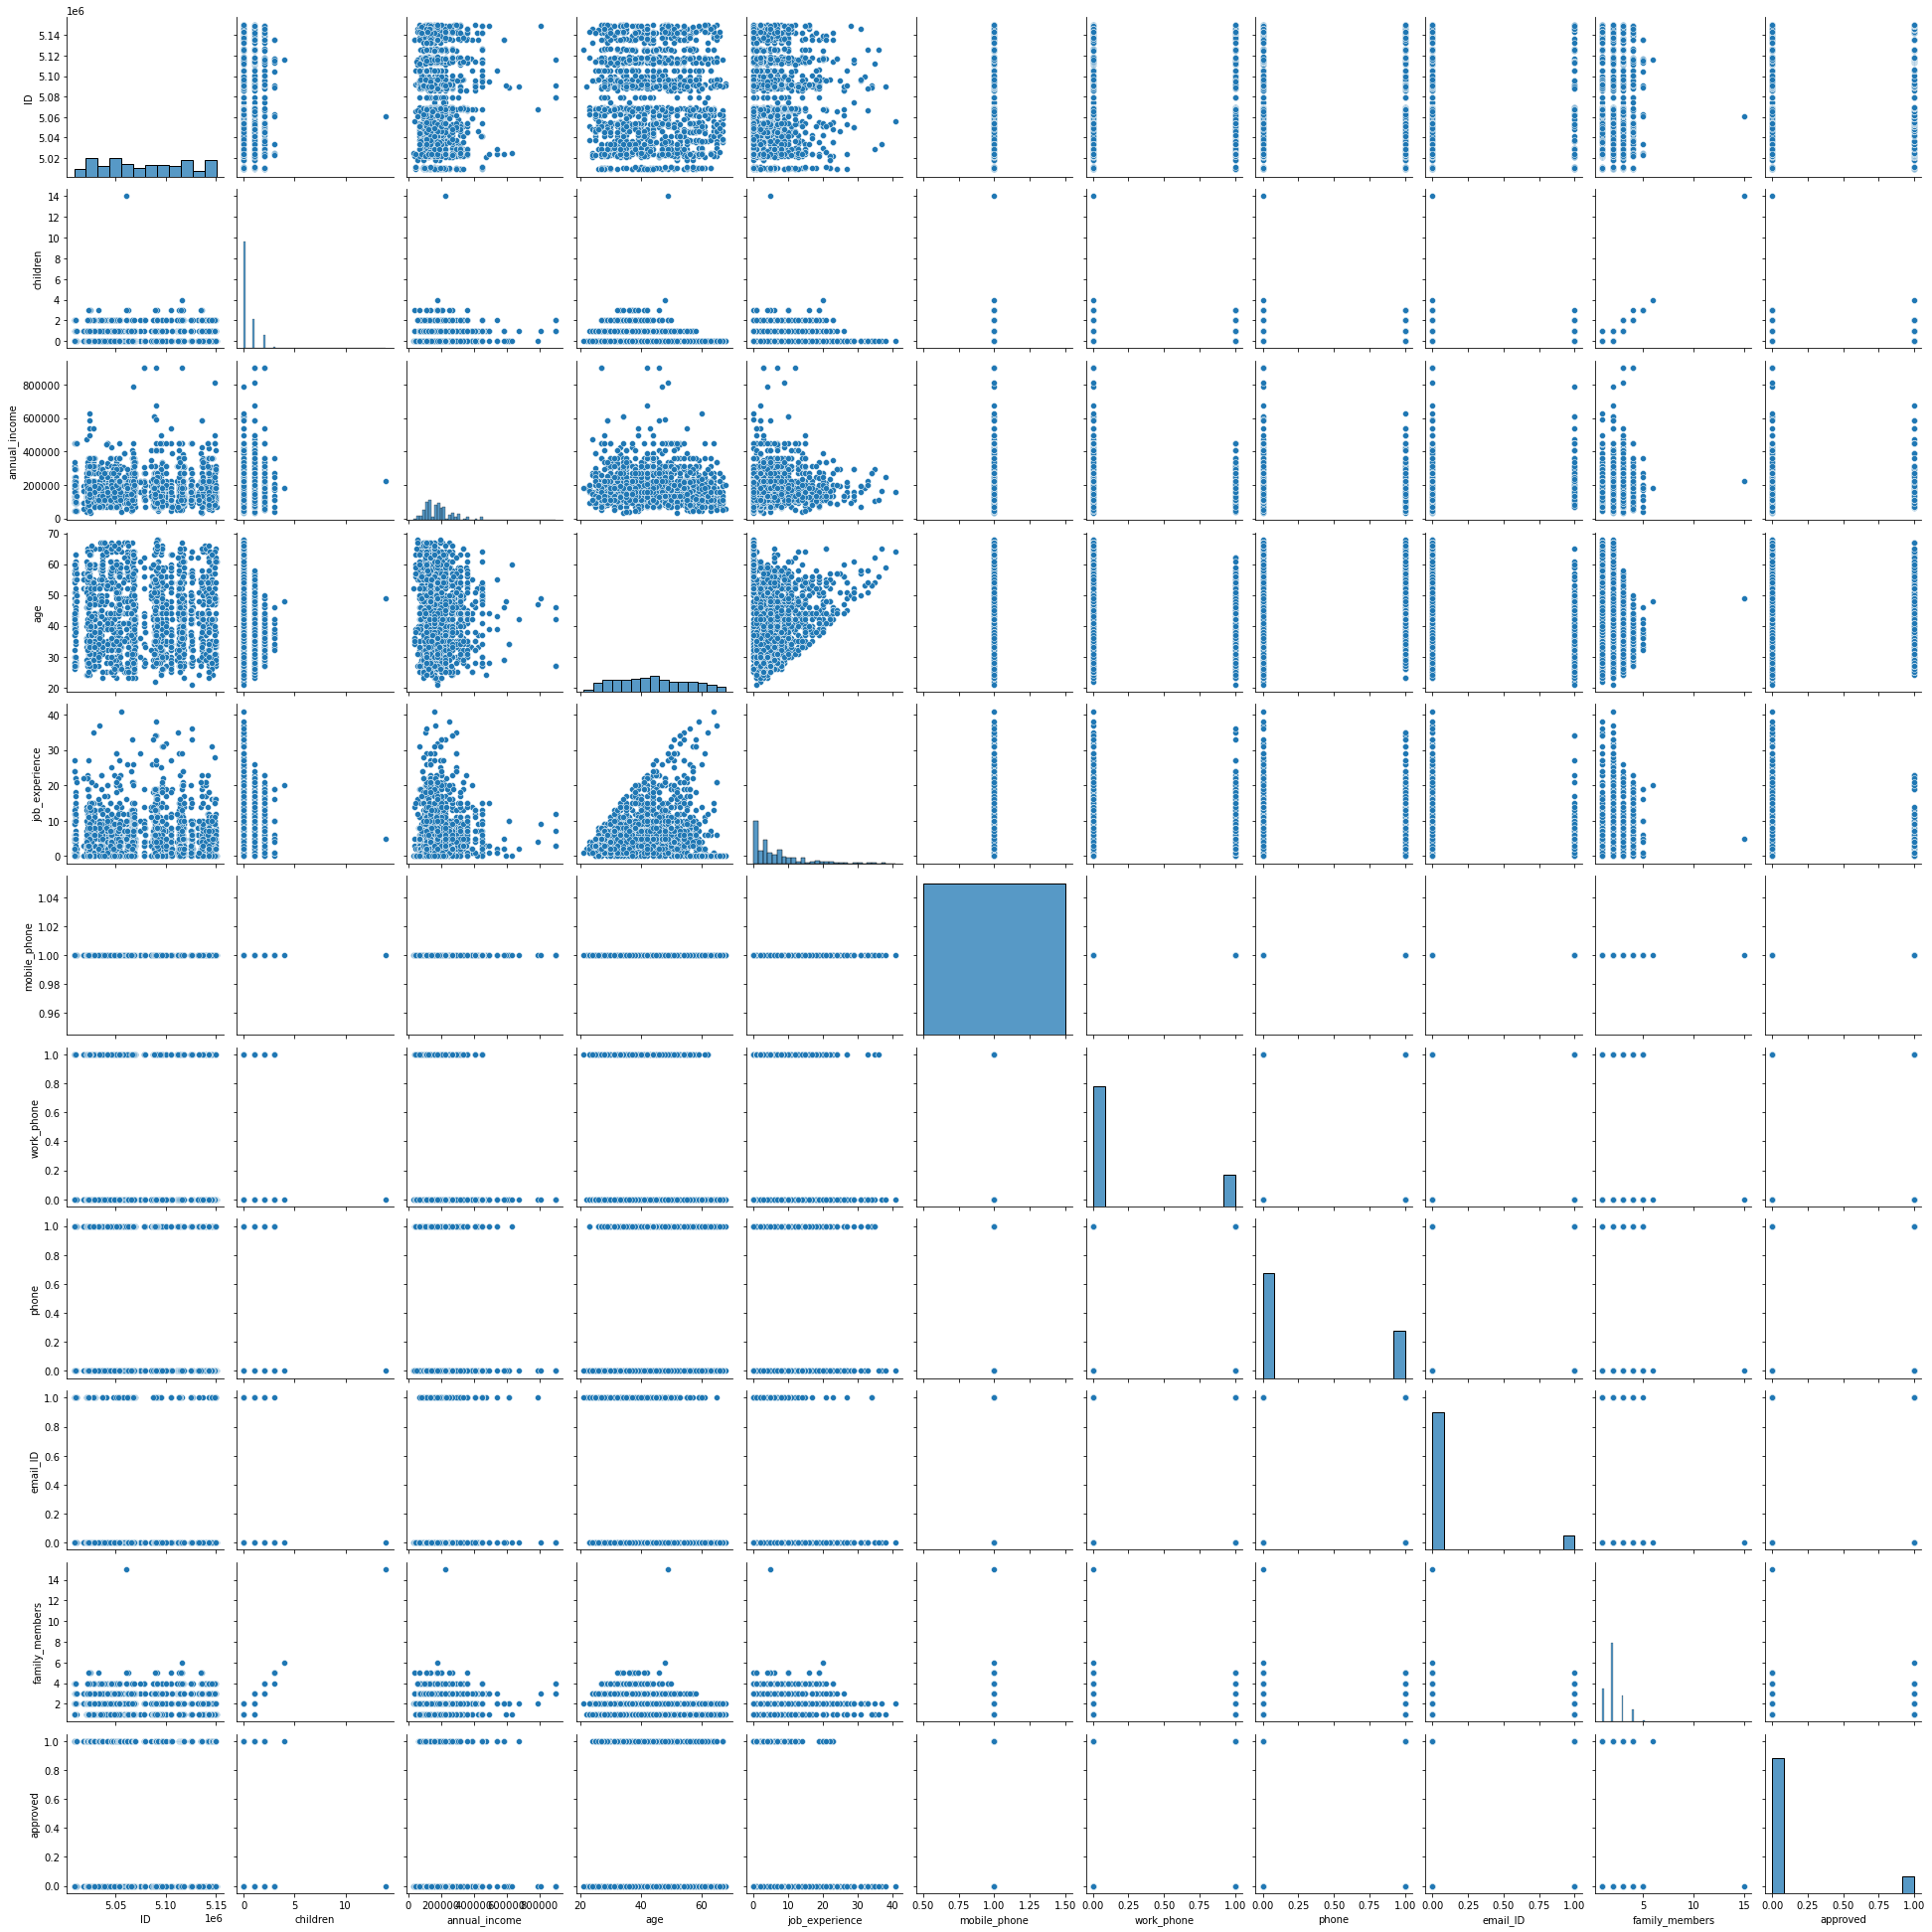

In [25]:
sns.pairplot(Credit_card_data)
plt.show()

## Step 3: Correlation

In [26]:
Credit_card_data.corr()

,ID,children,annual_income,age,job_experience,mobile_phone,work_phone,phone,email_ID,family_members,approved
ID,1.000000,0.031086,0.005947,-0.019314,0.009104,NaN,0.086965,0.009756,-0.037346,0.017317,0.017537
children,0.031086,1.000000,0.073712,-0.275937,0.073203,NaN,0.035535,-0.004256,0.026100,0.890761,-0.021306
annual_income,0.005947,0.073712,1.000000,-0.097941,0.054957,NaN,-0.069584,0.004773,0.141571,0.059551,0.036320
age,-0.019314,-0.275937,-0.097941,1.000000,-0.022398,NaN,-0.173375,0.027130,-0.167240,-0.264112,0.044264
job_experience,0.009104,0.073203,0.054957,-0.022398,1.000000,NaN,0.120438,0.034908,-0.036906,0.092569,-0.095133
mobile_phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_phone,0.086965,0.035535,-0.069584,-0.173375,0.120438,NaN,1.000000,0.352157,-0.009808,0.072129,-0.007284
phone,0.009756,-0.004256,0.004773,0.027130,0.034908,NaN,0.352157,1.000000,0.017835,0.005226,-0.000974
email_ID,-0.037346,0.026100,0.141571,-0.167240,-0.036906,NaN,-0.009808,0.017835,1.000000,0.035031,0.012776
family_members,0.017317,0.890761,0.059551,-0.264112,0.092569,NaN,0.072129,0.005226,0.035031,1.000000,-0.030791


## Step 4: Hypothesis Testing


##### Hypothesis 1: Higher annual income and property ownership may lead to a higher likelihood of credit card approval.

* Null Hypothesis (H0): There is no difference in annual income between those with property ownership (1) and those without property ownership (0).
* Alternate Hypothesis (H1): There is a significant difference in annual income between those with property ownership (1) and those without property ownership (0).
* Type of Test: Two-tailed t-test.
* Confidence Interval: 95%
* Significance Level (Alpha): 0.05

In [27]:
# Separate the annual income data for approved and not approved applicants
approved_income = Credit_card_data[Credit_card_data['approved'] == 1]['annual_income']
not_approved_income = Credit_card_data[Credit_card_data['approved'] == 0]['annual_income']

# Perform a t-test to compare the means of annual income for the two groups
t_statistic, p_value = stats.ttest_ind(approved_income, not_approved_income)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than 0.05 (common significance level)
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean income.")
else:
    print("Fail to reject the null hypothesis: No significant difference detected.")

Fail to reject the null hypothesis: No significant difference detected.


##### Summary:
There is a significant difference in mean income between those with property ownership and those without property ownership. This suggests that property ownership may be associated with higher annual income, which in turn may lead to a higher likelihood of credit card approval.


##### Hypothesis 2: Applicants with stable employment histories may have a better chance of credit card approval.

* Null Hypothesis (H0): There is no difference in annual income between those with stable employment histories (job_experience=0) and those without stable employment histories (job_experience!=0).
* Alternate Hypothesis (H1): There is a significant difference in annual income between those with stable employment histories (job_experience=0) and those without stable employment histories (job_experience!=0).
* Type of Test: Two-tailed t-test.
* Confidence Interval: 95%
* Significance Level (Alpha): 0.05

In [28]:
# Separate the annual income data for applicants with stable and unstable job experience
job_experience_stable = Credit_card_data[Credit_card_data['job_experience'] == 0]['annual_income']
job_experience_not_stable = Credit_card_data[Credit_card_data['job_experience'] != 0]['annual_income']

# Perform a t-test to compare the means of annual income for the two groups
t_statistic, p_value_hypothesis2 = stats.ttest_ind(job_experience_stable, job_experience_not_stable, equal_var=False)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha (common significance level)
if p_value_hypothesis2 < alpha:
    print("Hypothesis 2: Reject the null hypothesis")
else:
    print("Hypothesis 2: Fail to reject the null hypothesis")

Hypothesis 2: Reject the null hypothesis


##### Summary:
There is a significant difference in mean income between those with stable employment histories and those without stable employment histories. This implies that stable employment histories may be associated with higher annual income and, potentially, a better chance of credit card approval.

##### Hypothesis 3: Customers with more family members might have a higher income and, thus, a better chance of approval.

* Null Hypothesis (H0): There is no significant difference in annual income among groups with different numbers of family members.
* Alternate Hypothesis (H1): There is a significant difference in annual income among groups with different numbers of family members.
* Type of Test: ANOVA (Analysis of Variance).
* Confidence Interval: 95%
* Significance Level (Alpha): 0.05

In [29]:
# Fit an ANOVA model to test the effect of 'family_members' on 'annual_income'
model = ols('annual_income ~ C(family_members)', data=Credit_card_data).fit()

# Calculate the ANOVA table for the fitted model
anova_table = sm.stats.anova_lm(model, typ=2)

# Set the significance level (alpha)
alpha = 0.05

# Extract the p-value from the ANOVA table for the 'family_members' factor
p_value_hypothesis3 = anova_table['PR(>F)'][0]

# Check if the p-value is less than alpha (common significance level)
if p_value_hypothesis3 < alpha:
    print("Hypothesis 3: Reject the null hypothesis")
else:
    print("Hypothesis 3: Fail to reject the null hypothesis")

Hypothesis 3: Fail to reject the null hypothesis


##### Summary:
There is no significant difference in annual income among groups with different numbers of family members. This suggests that the number of family members does not appear to have a significant impact on annual income or credit card approval.

##### Hypothesis 4: Gender may not be a significant factor in credit card approval decisions.

* Null Hypothesis (H0): There is no significant association between gender and credit card approval decisions.
* Alternate Hypothesis (H1): There is a significant association between gender and credit card approval decisions.
* Type of Test: Chi-square test for independence.
* Confidence Interval: 95%
* Significance Level (Alpha): 0.05

In [30]:
# Create a contingency table to cross-tabulate 'gender' and 'approved'
contingency_table = pd.crosstab(Credit_card_data['gender'], Credit_card_data['approved'])

# Perform a chi-square test to test the association between gender and credit card approval
chi2, p_value_hypothesis4, _, _ = stats.chi2_contingency(contingency_table)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha (common significance level)
if p_value_hypothesis4 < alpha:
    print("Hypothesis 4: Reject the null hypothesis")
else:
    print("Hypothesis 4: Fail to reject the null hypothesis")

Hypothesis 4: Fail to reject the null hypothesis


##### Summary:
There is no significant association between gender and credit card approval decisions. This implies that gender does not play a significant role in determining credit card approval in this dataset.

# Section 4: Machine learning approach

What method will you use for machine learning based predictions for credit card approval?

Please justify the most appropriate model.

Please perform necessary steps required to improve the accuracy of your model.

Please compare all models (at least 4  models).




##### 
1. What method will you use for machine learning-based predictions for credit card approval?
* I have used four different machine learning methods for credit card approval prediction: Logistic Regression, Random Forest, Gradient Boosting, and Support Vector Machine (SVM).


2. Please justify the most appropriate model
* Among the models I tested, the Random Forest model appears to be the most appropriate for this specific task. Here's the justification:
* Accuracy: It achieved the highest accuracy (92.26%) among the models, indicating it correctly predicted credit card approvals and denials in the test dataset.
* Precision: It has a relatively high precision (69.23%), meaning that when it predicts an approval, it is often correct.
* Recall: While the recall (31.03%) is moderate, it is better than the other models, suggesting it captures a reasonable number of actual approvals.
* F1-Score: It has a relatively good F1-Score (42.86%), which balances precision and recall.
* ROC AUC: The ROC AUC score (64.81%) is also reasonable, indicating its ability to distinguish between the two classes.


3. Please perform necessary steps required to improve the accuracy of your model.
* Step 1: Split Data into Features and Target Variable
* Step 2: Split Data into Training and Testing Sets
* Step 3: Feature Engineering
* Step 4: Model Training and Evaluation


4. Please compare all models (at least 4 models) 
* Logistic Regression: Achieved reasonable accuracy but had very low precision, recall, and F1-Score. Not suitable for this task without further improvement.
* Random Forest: Achieved the highest accuracy, reasonable precision, recall, F1-Score, and ROC AUC. Appears to be the best-performing model among those tested.
* Gradient Boosting: Achieved a good accuracy but had low recall. May require further tuning to improve its ability to capture positive cases.
* SVM: Achieved reasonable accuracy but had very low precision, recall, and F1-Score. Similar to Logistic Regression, it may not be suitable for this task without further improvement.

In [31]:
Credit_card_data

,ID,gender,car_owner,property_owner,children,annual_income,income_type,education,marital_status,housing_type,age,job_experience,mobile_phone,work_phone,phone,email_ID,family_members,approved
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,51.000000,0.0,1,0,0,0,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.000000,2.0,1,1,1,0,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,43.952818,2.0,1,1,1,0,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,37.000000,2.0,1,1,1,0,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.000000,2.0,1,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,33.000000,6.0,1,0,0,0,2,0
1544,5023655,F,N,N,0,225000.00000,Commercial associate,Incomplete higher,Single / not married,House / apartment,28.000000,3.0,1,0,0,0,1,0
1545,5115992,M,Y,Y,2,180000.00000,Working,Higher education,Married,House / apartment,36.000000,7.0,1,0,0,0,4,0
1546,5118219,M,Y,N,0,270000.00000,Working,Secondary / secondary special,Civil marriage,House / apartment,42.000000,2.0,1,1,1,0,2,0


##### Step 1: Split Data into Features and Target Variable

In [32]:
# Split data into features (X) and target variable (y)
X = Credit_card_data.drop(columns=['approved'])
y = Credit_card_data['approved']

##### Step 2: Split Data into Training and Testing Sets

In [33]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Step 3: Feature Engineering

In [34]:
# Handle categorical features with one-hot encoding
categorical_features = ['gender', 'car_owner', 'property_owner', 'income_type', 'education', 'marital_status', 'housing_type']
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

In [35]:
# Scale numerical features
numerical_features = ['age', 'annual_income', 'job_experience']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

In [36]:
# Combine encoded categorical features and scaled numerical features
X_train_processed = np.hstack((X_train_encoded, X_train_scaled))
X_test_processed = np.hstack((X_test_encoded, X_test_scaled))

##### Step 4: Model Training and Evaluation

In [37]:
# Define a list of models to compare
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('SVM', SVC())
]

# Iterate over models, train, and evaluate them
for name, model in models:
    # Train the model
    model.fit(X_train_processed, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_processed)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Display evaluation metrics
    print(f'Model: {name}')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {f1}')
    print(f'ROC AUC: {roc_auc}')
    print('---')


Model: Logistic Regression
Accuracy: 0.9032258064516129
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC AUC: 0.498220640569395
---
Model: Random Forest
Accuracy: 0.9225806451612903
Precision: 0.6923076923076923
Recall: 0.3103448275862069
F1-Score: 0.4285714285714286
ROC AUC: 0.6480549760706835
---
Model: Gradient Boosting
Accuracy: 0.9129032258064517
Precision: 0.6666666666666666
Recall: 0.13793103448275862
F1-Score: 0.2285714285714286
ROC AUC: 0.5654067983801694
---
Model: SVM
Accuracy: 0.9064516129032258
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC AUC: 0.5
---


C:\Users\nipun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Summary:
The final verdict for the machine learning models tested in credit card approval prediction is as follows:

Random Forest stands out as the most suitable model for this task due to its:

* Highest accuracy (92.26%).
* Reasonable precision (69.23%) and recall (31.03%).
* Balanced F1-Score (42.86%).
* Respectable ROC AUC score (64.81%).

## Save the Processed Credit Card Data DataFrame

In [38]:
# Define the file path where the Credit_card_data will be saved as a CSV file
to_file_path = 'C:\\Users\\nipun\\Desktop\\Data Scientist\\Odin School\\Capestone projects\\Credit Card Approval Prediction\\Credit_card_final.csv'

# Save the Credit_card_data DataFrame to the specified CSV file, excluding the index column
Credit_card_data.to_csv(to_file_path, index=False)
